In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train_ID = train['Id']
test_ID = test['Id']
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)
train.shape, test.shape

((1460, 80), (1459, 79))

# 1. Data Pre-Processing
## 1.1. Outliers

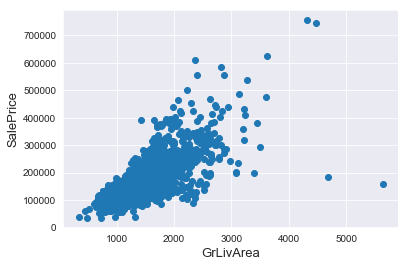

In [7]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#### 오른쪽 아래 낮은 가격의 GrLivArea 이상치 2개 제거

In [8]:
train = train.drop(train[(train['GrLivArea'] > 4000) & 
                         (train['SalePrice'] < 300000)].index)

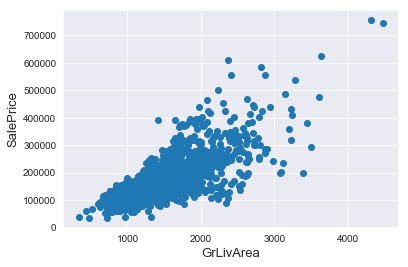

In [9]:
fig, ax = plt.subplots()
ax.scatter(x=train['GrLivArea'], y=train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 1.2. Target Variable

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


mu = 180932.92, sigma = 79467.79


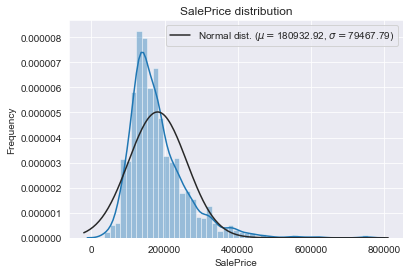

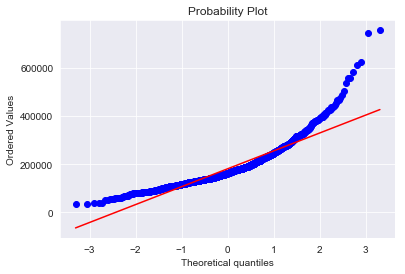

In [10]:
sns.distplot(train['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)],
          loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

* right skewed

#### Log-transformation

mu = 12.02, sigma = 0.40


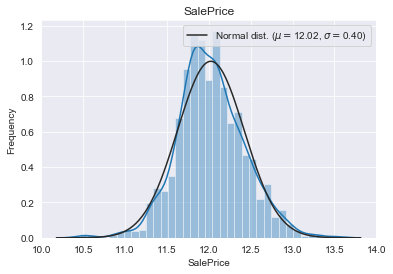

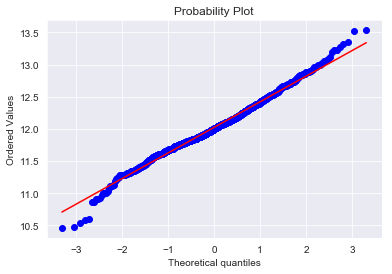

In [11]:
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f}, sigma = {:.2f}'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## 1.3. Missing Data

In [12]:
missing = train.isnull().sum().sort_values(ascending=False)
missing.drop(missing[missing==0].index, inplace=True)
missing = pd.DataFrame({'Missing': missing, 'Ratio': missing/train.shape[0]*100})
print(len(missing))
missing

19


,Missing,Ratio
PoolQC,1452,99.588
MiscFeature,1404,96.296
Alley,1367,93.759
Fence,1177,80.727
FireplaceQu,690,47.325
LotFrontage,259,17.764
GarageType,81,5.556
GarageCond,81,5.556
GarageFinish,81,5.556
GarageQual,81,5.556


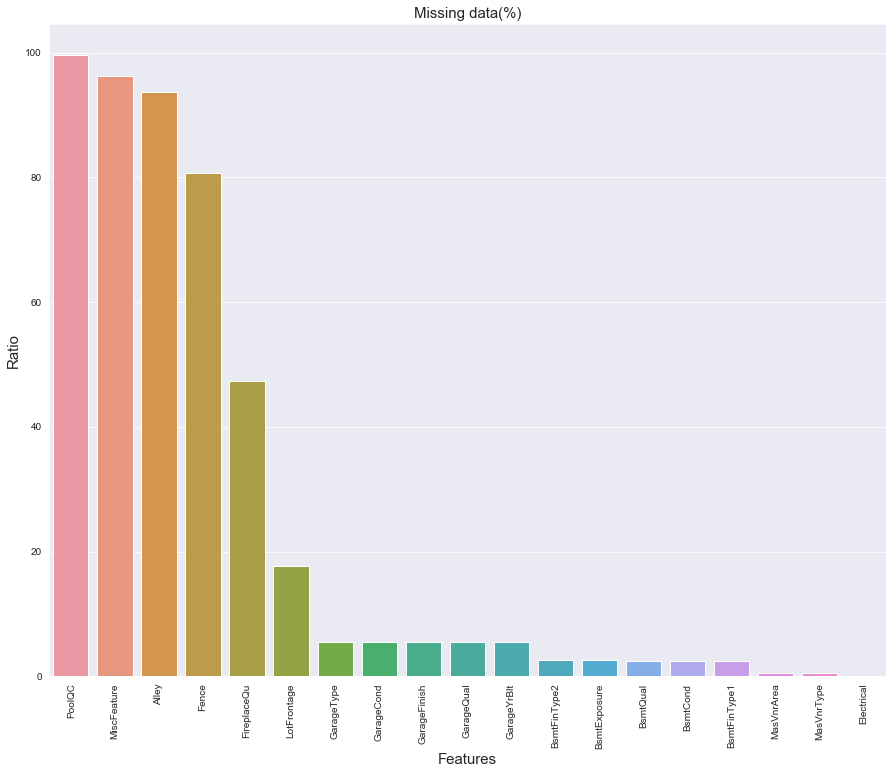

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(missing.index, missing['Ratio'])
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Ratio', fontsize=15)
plt.title('Missing data(%)', fontsize=15)
plt.show()

In [14]:
missing = test.isnull().sum().sort_values(ascending=False)
missing.drop(missing[missing==0].index, inplace=True)
missing = pd.DataFrame({'Missing': missing, 'Ratio': missing/test.shape[0]*100})
print(len(missing))
missing

33


,Missing,Ratio
PoolQC,1456,99.794
MiscFeature,1408,96.504
Alley,1352,92.666
Fence,1169,80.123
FireplaceQu,730,50.034
LotFrontage,227,15.559
GarageCond,78,5.346
GarageFinish,78,5.346
GarageYrBlt,78,5.346
GarageQual,78,5.346


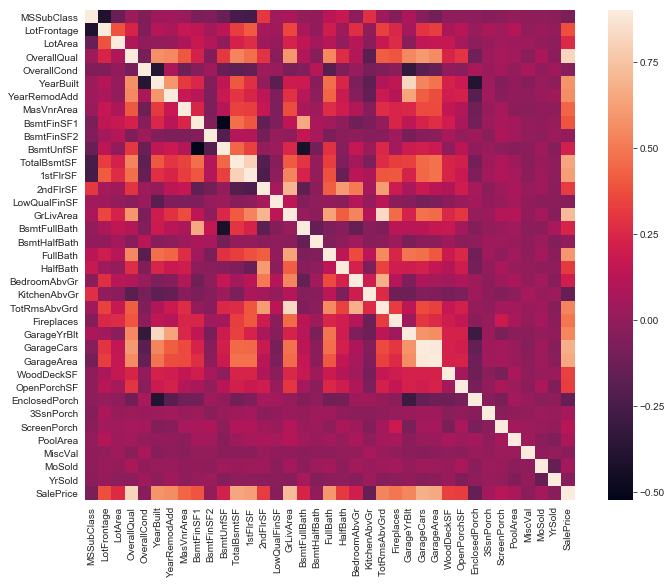

In [15]:
corr = train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=0.9, square=True)
plt.show()

In [16]:
#columns = [column for column in train.columns if train[column].dtype != 'object']
#f = pd.melt(train, id_vars=['MSZoning'], value_vars=columns)
#g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
#g = g.map(sns.boxplot, 'MSZoning', 'value')

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin

class Imputer(BaseEstimator, TransformerMixin):
    def fit(self, X):
        bins = []
        bins.append(0)
        [bins.append(train['LotArea'].describe()[i].astype(np.int32)) for i in range(3, 8)]
        X['LotArea_interval'], self.bins = pd.cut(X['LotArea'], bins, labels=False, retbins=True) 
        self.LotFrontage_median_group_by_LotArea_interval = X.groupby('LotArea_interval')['LotFrontage'].median()
        self.MSZoning_mode = X['MSZoning'].mode()[0]
        self.Electrical_mode = X['Electrical'].mode()[0]
        self.Exterior1st_mode = X['Exterior1st'].mode()[0]
        self.Exterior2nd_mode = X['Exterior2nd'].mode()[0]
        self.SaleType_mode = X['SaleType'].mode()[0]
        return self
        
    def transform(self, X):
        X['PoolQC'].fillna('None', inplace=True)
        X['MiscFeature'].fillna('None', inplace=True)
        X['Alley'].fillna('None', inplace=True)
        X['Fence'].fillna('None', inplace=True)
        X['FireplaceQu'].fillna('None', inplace=True)
        # train LotFrontage, LotArea_interval correlation coefficient = 0.62
        X['LotArea_interval'] = pd.cut(X['LotArea'], bins=self.bins, labels=False)
        idx = X[X['LotFrontage'].isnull()].index.values
        for i in idx:
            X.loc[i, 'LotFrontage'] = self.LotFrontage_median_group_by_LotArea_interval[X.loc[i, 'LotArea_interval']]
       
        for i in ('GarageType', 'GarageCond', 'GarageFinish', 'GarageQual'):
            X[i].fillna('None', inplace=True)
        for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
            X[i].fillna(0, inplace=True)
        for i in ('BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1', 'BsmtQual'):
            X[i].fillna('None', inplace=True)
        for i in ('BsmtHalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF'):
            X[i].fillna(0, inplace=True)
        X['MasVnrType'].fillna('None', inplace=True)
        X['MasVnrArea'].fillna(0, inplace=True)
        X['Electrical'].fillna(self.Electrical_mode, inplace=True)
        X['MSZoning'].fillna(self.MSZoning_mode, inplace=True)
        X['Utilities'].fillna('AllPub', inplace=True)
        X['Functional'].fillna('Typ', inplace=True)
        X['SaleType'].fillna(self.SaleType_mode, inplace=True)
        X['Exterior1st'].fillna(self.Exterior1st_mode, inplace=True)
        X['Exterior2nd'].fillna(self.Exterior2nd_mode, inplace=True)
        X['KitchenQual'].fillna('TA', inplace=True)
            
  
imputer = Imputer()
imputer.fit_transform(train)
imputer.transform(test)

In [18]:
missing = train.isnull().sum().sort_values(ascending=False)
missing.drop(missing[missing==0].index, inplace=True)
missing = pd.DataFrame({'Missing': missing, 'Ratio': missing/train.shape[0]*100})
print(len(missing))
missing

0


,Missing,Ratio


In [19]:
missing = test.isnull().sum().sort_values(ascending=False)
missing.drop(missing[missing==0].index, inplace=True)
missing = pd.DataFrame({'Missing': missing, 'Ratio': missing/test.shape[0]*100})
print(len(missing))
missing

0


,Missing,Ratio


In [20]:
numeric_features = train.dtypes[train.dtypes != 'object'].index
skewness = train[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

MiscVal         24.435
PoolArea        15.933
LotArea         12.561
3SsnPorch       10.287
LowQualFinSF     8.996
KitchenAbvGr     4.480
BsmtFinSF2       4.248
ScreenPorch      4.115
BsmtHalfBath     4.096
EnclosedPorch    3.084
MasVnrArea       2.694
OpenPorchSF      2.337
WoodDeckSF       1.544
LotFrontage      1.438
MSSubClass       1.406
GrLivArea        1.010
BsmtUnfSF        0.920
1stFlrSF         0.887
2ndFlrSF         0.812
BsmtFinSF1       0.764
GarageYrBlt     -3.862
dtype: float64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 81 columns):
MSSubClass          1458 non-null int64
MSZoning            1458 non-null object
LotFrontage         1458 non-null float64
LotArea             1458 non-null int64
Street              1458 non-null object
Alley               1458 non-null object
LotShape            1458 non-null object
LandContour         1458 non-null object
Utilities           1458 non-null object
LotConfig           1458 non-null object
LandSlope           1458 non-null object
Neighborhood        1458 non-null object
Condition1          1458 non-null object
Condition2          1458 non-null object
BldgType            1458 non-null object
HouseStyle          1458 non-null object
OverallQual         1458 non-null int64
OverallCond         1458 non-null int64
YearBuilt           1458 non-null int64
YearRemodAdd        1458 non-null int64
RoofStyle           1458 non-null object
RoofMatl            1458 non-null obj

## 1.4. Feature Engineering

In [22]:
from sklearn.preprocessing import OrdinalEncoder
from scipy.special import boxcox1p

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, add_features=True):
        self.add_features = add_features
        
    def pre_transform(self, X):
        #X['MSSubClass'] = X['MSSubClass'].apply(str)
        X.replace({'MSSubClass': {20: 'SC20', 30: 'SC30', 40: 'SC40', 45: 'SC45', 
                                   50: 'SC50', 60: 'SC60', 70: 'SC70', 75: 'SC75', 
                                   80: 'SC80', 85: 'SC85', 90: 'SC90', 
                                   120: 'SC120', 150: 'SC150', 160: 'SC160', 
                                   180: 'SC180', 190: 'SC190'}}, inplace=True)
        X['OverallQual'] = X['OverallQual'].apply(str)
        X['OverallCond'] = X['OverallCond'].apply(str)
        X['MoSold'] = X['MoSold'].apply(str)
        X['YrSold'] = X['YrSold'].apply(str)

    def fit(self, X):
        # ordered set encoding
        self.columns = ['Street', 'Alley', 'LotShape', 'LandSlope',
            'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 
            'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 
            'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MoSold', 
            'YrSold']
        self.ordi_encoder = OrdinalEncoder(categories='auto')
        self.ordi_encoder.fit(X[self.columns])
        
        # skewed features
        numeric_features = X.dtypes[X.dtypes != 'object'].index
        skewness = X[numeric_features].apply(lambda x: skew(x))
        skewness = skewness[abs(skewness) > 0.75]
        self.skewed_features = skewness.index
        return self
            
    def transform(self, X):
        # encoding
        X[self.columns] = self.ordi_encoder.transform(X[self.columns])
        # add features
        if self.add_features:
            X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
        # transform skewed features
        lam = 0.15
        for feature in self.skewed_features:
            X[feature] = boxcox1p(X[feature], lam)
        # get dummy
        return pd.get_dummies(X)
        
engineering = FeatureEngineering()
engineering.pre_transform(train)
engineering.pre_transform(test)
train = engineering.fit_transform(train)
test = engineering.transform(test)

In [23]:
train.shape, test.shape

((1458, 255), (1459, 240))

In [24]:
from sklearn.preprocessing import RobustScaler

y_train = train['SalePrice']
y_column_idx = list(train.columns.values).index('SalePrice')
feature_names = list(train.columns.values)
del feature_names[y_column_idx]
X_train = train[feature_names]
X_train.shape

(1458, 254)

In [25]:
diff_dummy1 = set(X_train.columns) - set(test.columns)
diff_df1 = pd.DataFrame(np.zeros((test.shape[0], len(diff_dummy1))), 
                       columns=diff_dummy1, index=test.index)
X_test = pd.concat([test, diff_df1], axis=1)
X_test.shape

(1459, 255)

In [26]:
diff_dummy2 = set(X_test.columns) - set(X_train.columns)
diff_df2 = pd.DataFrame(np.zeros((X_train.shape[0], len(diff_dummy2))), 
             columns=diff_dummy2, index=X_train.index)
X_train = pd.concat([X_train, diff_df2], axis=1)
X_train.shape

(1458, 255)

In [27]:
X_train_scaled = RobustScaler().fit_transform(X_train)
X_test_scaled = RobustScaler().fit_transform(X_test)

# 2. Modeling

In [28]:
from sklearn.model_selection import cross_val_score, train_test_split

def rmse_cv(model, ret_rmse_val=False):
    rmse = np.sqrt(-cross_val_score(model, X_train.values, y_train, 
                                   scoring='neg_mean_squared_error', cv=10))
    if ret_rmse_val == True:
        return rmse
    return pd.Series(rmse).describe()

In [29]:
def compare_rmse(models):
    model_names = []
    for model in models:
        model_names.append(str(model).split('(')[0])
        package_name = str(model.__class__).split('.')[1]
        if package_name == 'linear_model' or package_name == 'svm':
            model_reg = make_pipeline(RobustScaler(), model)
            model_rmse_desc = rmse_cv(model_reg)
        else:
            model_rmse_desc = rmse_cv(model)
            #print(str(model).split('(')[0])
        if model == models[0]:
            result = model_rmse_desc
        else:
            result = pd.concat([result, model_rmse_desc], axis=1)
    result.columns = model_names
    return result.T.sort_values(by='mean')

In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

compare_rmse([LinearRegression(), Ridge(), Lasso(), ElasticNet()])

,count,mean,std,min,25%,50%,75%,max
Ridge,10.000,0.114,0.017,0.093,0.104,0.109,0.121,0.148
LinearRegression,10.000,0.121,0.017,0.098,0.111,0.121,0.128,0.158
ElasticNet,10.000,0.378,0.021,0.357,0.362,0.370,0.389,0.421
Lasso,10.000,0.378,0.021,0.356,0.362,0.371,0.390,0.423


#### Ridge tuning

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.arange(0.01, 10, 0.1)}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', 
                           cv=10, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
ridge_best_params = grid_search.best_params_
print('best params :', ridge_best_params)
ridge_best_score = np.sqrt(-grid_search.best_score_)
print('best score :', ridge_best_score)

best params : {'alpha': 4.71}
best score : 0.11258731199524531


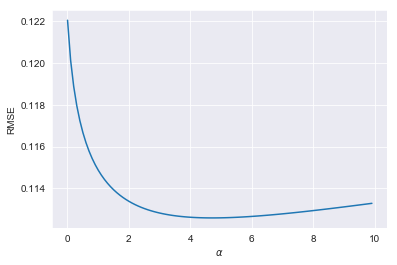

In [32]:
cvres = grid_search.cv_results_
param_df = pd.DataFrame(cvres['params'])
plt.plot(param_df['alpha'], np.sqrt(-cvres['mean_test_score']))
plt.xlabel(r'$\alpha$')
plt.ylabel('RMSE')
plt.show()

#### Lasso tuning

In [33]:
param_grid = {'alpha': np.arange(0.0001, 0.001, 0.0005)}
grid_search = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', 
                           cv=10, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
lasso_best_params = grid_search.best_params_
print('best params :', lasso_best_params)
lasso_best_score = np.sqrt(-grid_search.best_score_)
print('best score :', lasso_best_score)

best params : {'alpha': 0.0006000000000000001}
best score : 0.11204081334001222


In [34]:
lasso_best = Lasso(alpha=lasso_best_params['alpha'])
lasso_best.fit(X_train_scaled, y_train)
coef = pd.Series(lasso_best.coef_, index=X_train.columns)
sum(coef != 0), sum(coef == 0)

(101, 154)

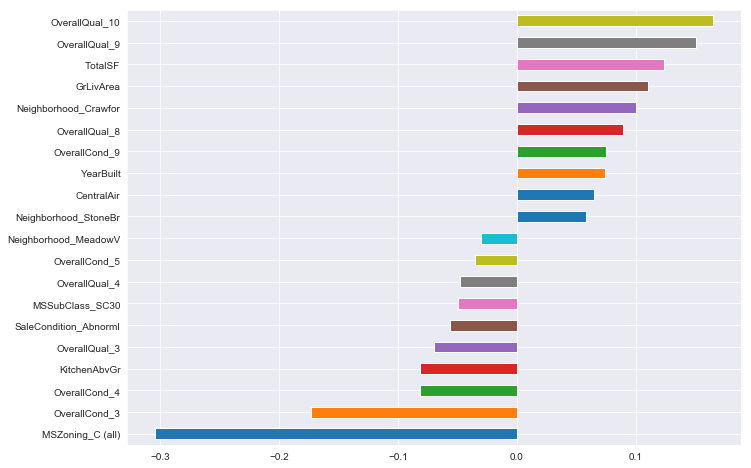

In [35]:
importance = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
plt.figure(figsize=(11, 8))
importance.plot(kind='barh')
plt.show()

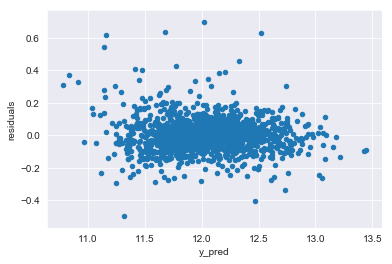

In [36]:
pred_df = pd.DataFrame({'y_pred': lasso_best.predict(X_train_scaled), 'y': y_train})
pred_df['residuals'] = pred_df['y_pred'] - pred_df['y']
pred_df.plot('y_pred', 'residuals', kind='scatter')
plt.show()

#### ElasticNet tuning

In [37]:
param_grid = {'alpha': [0.0003, 0.0005, 0.001], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10,
                        scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
elastic_best_params = grid_search.best_params_
print('best params :', elastic_best_params)
elastic_best_score = np.sqrt(-grid_search.best_score_)
print('best score :', elastic_best_score)

best params : {'alpha': 0.0003, 'l1_ratio': 0.9}
best score : 0.11094431346929118


#### compare tuned models 

In [38]:
ridge = Ridge(alpha=ridge_best_params['alpha'])
lasso = Lasso(alpha=lasso_best_params['alpha'])
elastic = ElasticNet(alpha=elastic_best_params['alpha'], 
                     l1_ratio=elastic_best_params['l1_ratio'])

compare_rmse([LinearRegression(), ridge, lasso, elastic])

,count,mean,std,min,25%,50%,75%,max
ElasticNet,10.000,0.110,0.016,0.092,0.098,0.104,0.117,0.142
Lasso,10.000,0.111,0.015,0.095,0.100,0.105,0.119,0.142
Ridge,10.000,0.112,0.015,0.094,0.102,0.105,0.119,0.141
LinearRegression,10.000,0.121,0.017,0.098,0.111,0.121,0.128,0.158


#### final models

In [39]:
from sklearn.metrics import mean_squared_error

elastic_final = ElasticNet(alpha=elastic_best_params['alpha'], 
                     l1_ratio=elastic_best_params['l1_ratio'])
elastic_final.fit(X_train_scaled, y_train)
y_pred = np.expm1(elastic_final.predict(X_test_scaled))
submission = pd.DataFrame()
submission['Id'] = test_ID
submission['SalePrice'] = y_pred
submission.shape

(1459, 2)

In [40]:
submission.to_csv('submission.csv', index=False)